In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

Load Dataset and basic analysis

In [49]:
# Load datasets using the correct relative path, moving two directories up
training_data = pd.read_csv('../../data/training_data.csv')
test_data = pd.read_csv('../../data/test_data.csv')


In [50]:
# Display basic information about datasets
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614098 entries, 0 to 614097
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date_id      614098 non-null  object 
 1   item_dept    614098 non-null  object 
 2   item_qty     614098 non-null  float64
 3   net_sales    614098 non-null  float64
 4   store        614098 non-null  object 
 5   item         614098 non-null  int64  
 6   invoice_num  591288 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 32.8+ MB
None


In [51]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247624 entries, 0 to 247623
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date_id      247624 non-null  object 
 1   item_dept    247624 non-null  object 
 2   item_qty     247624 non-null  float64
 3   net_sales    247624 non-null  float64
 4   store        247624 non-null  object 
 5   item         247624 non-null  int64  
 6   invoice_num  239319 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 13.2+ MB
None


In [52]:
# Display first few rows
print("First 5 rows of Training Data:")
print(training_data.head())

First 5 rows of Training Data:
     date_id  item_dept  item_qty  net_sales store    item  invoice_num
0  11/1/2021    Grocery       1.0      160.0   XYZ   16620    1475459.0
1  11/1/2021    Grocery       2.0      480.0   XYZ   32365    1475459.0
2  11/1/2021    Grocery       1.0      127.0   XYZ   31349    1475459.0
3  11/1/2021  Household       2.0      110.0   XYZ    1266    1475475.0
4  11/1/2021  Household       1.0      150.0   XYZ  114920    1475475.0


In [53]:
# Display the data types and missing values
print("\nData Types and Missing Values:")
print(training_data.dtypes)
print(training_data.isnull().sum())


Data Types and Missing Values:
date_id         object
item_dept       object
item_qty       float64
net_sales      float64
store           object
item             int64
invoice_num    float64
dtype: object
date_id            0
item_dept          0
item_qty           0
net_sales          0
store              0
item               0
invoice_num    22810
dtype: int64


In [54]:
# Summary statistics
print("\nSummary Statistics:")
print(training_data.describe(include='all'))


Summary Statistics:
           date_id item_dept       item_qty      net_sales   store  \
count       614098    614098  614098.000000  614098.000000  614098   
unique          92         3            NaN            NaN       2   
top     12/31/2021   Grocery            NaN            NaN     XYZ   
freq         10752    337991            NaN            NaN  340659   
mean           NaN       NaN       1.533792     335.067969     NaN   
std            NaN       NaN       3.058092     824.733169     NaN   
min            NaN       NaN     -59.000000  -15250.000000     NaN   
25%            NaN       NaN       1.000000     124.000000     NaN   
50%            NaN       NaN       1.000000     215.000000     NaN   
75%            NaN       NaN       1.668000     371.000000     NaN   
max            NaN       NaN     880.000000  316880.280000     NaN   

                item   invoice_num  
count   614098.00000  5.912880e+05  
unique           NaN           NaN  
top              NaN       

In [55]:
# List of specific columns you want to perform value counts on
columns_to_count = ['item_dept', 'item_qty', 'net_sales', 'store']

# Loop through each specified column in the training_data dataframe
for column in columns_to_count:
    print(f"Value counts for column: {column}")
    print(training_data[column].value_counts())
    print("\n" + "-"*40 + "\n")

Value counts for column: item_dept
item_dept
Grocery      337991
Household    153951
Beverages    122156
Name: count, dtype: int64

----------------------------------------

Value counts for column: item_qty
item_qty
1.000    439684
2.000     88051
3.000     21023
5.000     12057
4.000     10116
          ...  
5.488         1
5.374         1
9.574         1
7.040         1
6.935         1
Name: count, Length: 3110, dtype: int64

----------------------------------------

Value counts for column: net_sales
net_sales
100.000    17017
70.000     14109
140.000    12747
150.000    11659
200.000    11253
           ...  
104.437        1
108.328        1
419.769        1
324.983        1
381.107        1
Name: count, Length: 23874, dtype: int64

----------------------------------------

Value counts for column: store
store
XYZ    340659
ABC    273439
Name: count, dtype: int64

----------------------------------------



In [56]:
# Loop through each specified column in the test_data dataframe
print("Value counts for test_data:")
for column in columns_to_count:
    print(f"Value counts for column: {column}")
    print(test_data[column].value_counts())
    print("\n" + "-"*40 + "\n")

Value counts for test_data:
Value counts for column: item_dept
item_dept
Grocery      135622
Household     60396
Beverages     51606
Name: count, dtype: int64

----------------------------------------

Value counts for column: item_qty
item_qty
1.000    181871
2.000     33097
3.000      7814
5.000      4263
4.000      3699
          ...  
6.766         1
3.210         1
5.346         1
4.566         1
4.066         1
Name: count, Length: 2443, dtype: int64

----------------------------------------

Value counts for column: net_sales
net_sales
540.000     8207
70.000      6409
100.000     5644
150.000     5440
140.000     5437
            ... 
367.120        1
613.844        1
647.920        1
555.830        1
2361.000       1
Name: count, Length: 12924, dtype: int64

----------------------------------------

Value counts for column: store
store
XYZ    138194
ABC    109430
Name: count, dtype: int64

----------------------------------------



Exploratory Data Analysis (EDA)

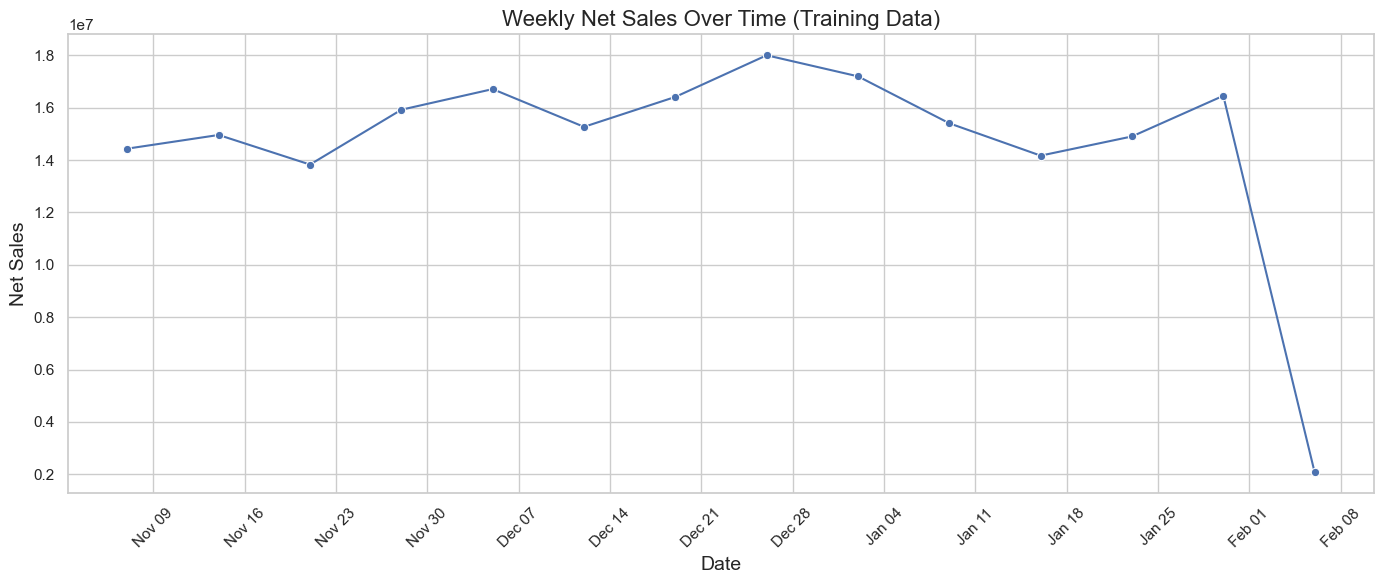

In [57]:
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Ensure 'date_id' is in datetime format
training_data['date_id'] = pd.to_datetime(training_data['date_id'], format='%m/%d/%Y')

# Resample net_sales by week to reduce the number of data points
weekly_sales = training_data.set_index('date_id').resample('W')['net_sales'].sum().reset_index()

# Plotting sales over time (weekly)
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_sales, x='date_id', y='net_sales', marker='o')
plt.title('Weekly Net Sales Over Time (Training Data)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Net Sales', fontsize=14)

# Format the x-axis to show dates in 'Month-Day' format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Set major ticks to weekly intervals

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels/titles
plt.show()


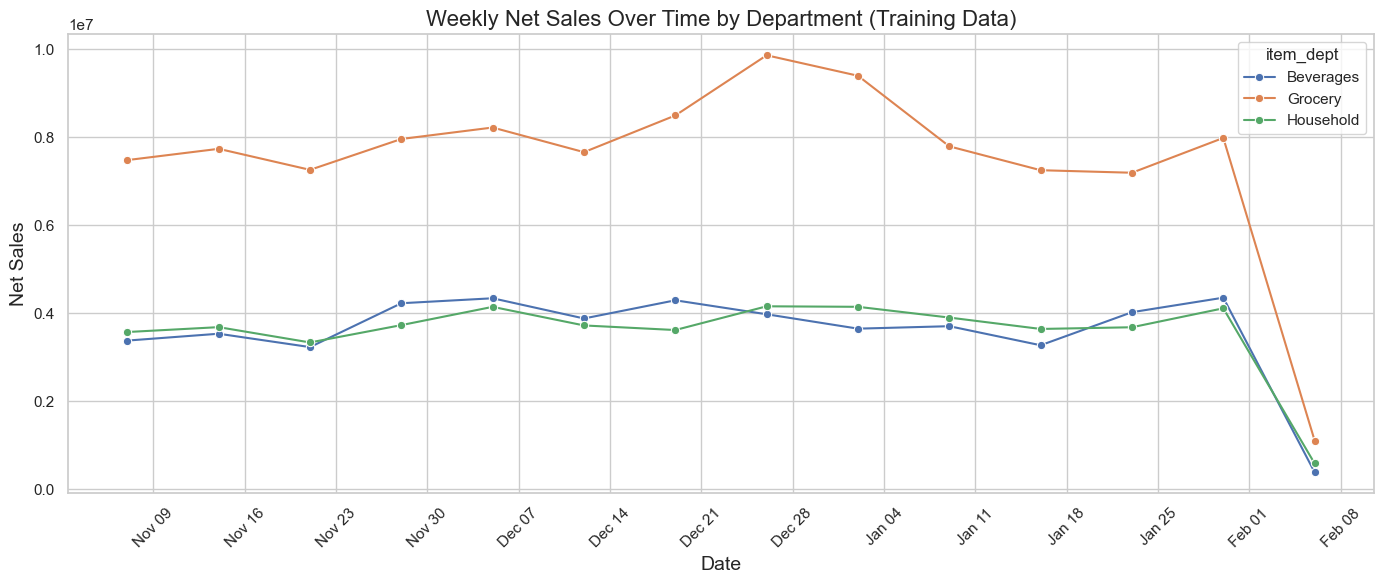

In [58]:
# Net_sales by week and department to reduce the number of data points
weekly_sales_by_dept = training_data.set_index('date_id').groupby(['item_dept', pd.Grouper(freq='W')])['net_sales'].sum().reset_index()

# Plotting sales trends over time for each department
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_sales_by_dept, x='date_id', y='net_sales', hue='item_dept', marker='o')
plt.title('Weekly Net Sales Over Time by Department (Training Data)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Net Sales', fontsize=14)

# Format the x-axis to show dates in 'Month-Day' format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Set major ticks to weekly intervals

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels/titles
plt.show()


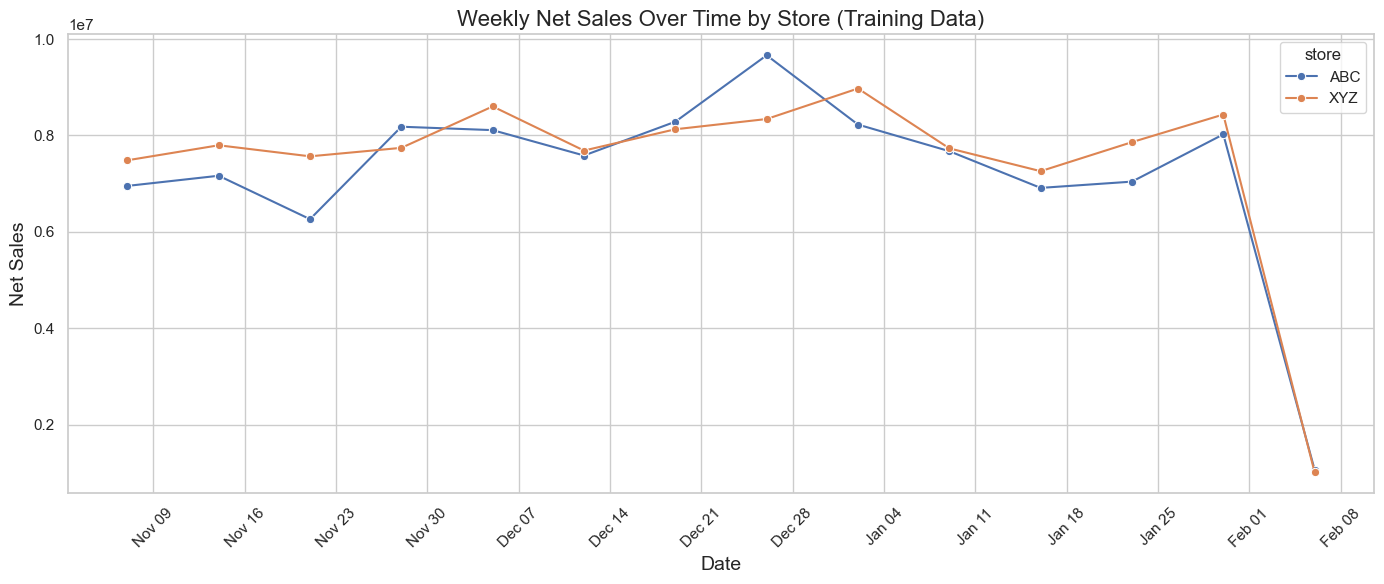

In [59]:
# Resample net_sales by week and store to reduce the number of data points
weekly_sales_by_store = training_data.set_index('date_id').groupby(['store', pd.Grouper(freq='W')])['net_sales'].sum().reset_index()

# Plotting sales trends over time for each store
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_sales_by_store, x='date_id', y='net_sales', hue='store', marker='o')
plt.title('Weekly Net Sales Over Time by Store (Training Data)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Net Sales', fontsize=14)

# Format the x-axis to show dates in 'Month-Day' format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Set major ticks to weekly intervals

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels/titles
plt.show()

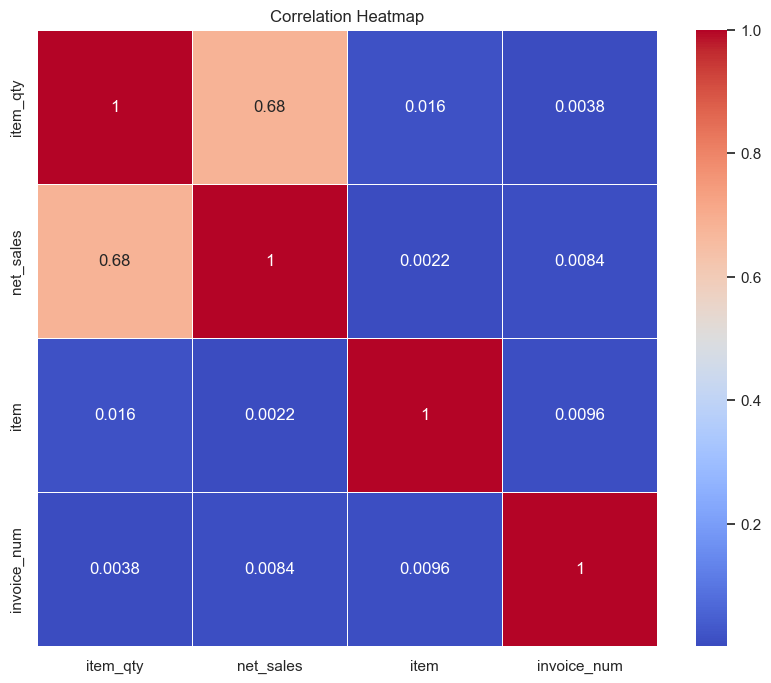

In [60]:
# Select only numeric columns
numeric_data = training_data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

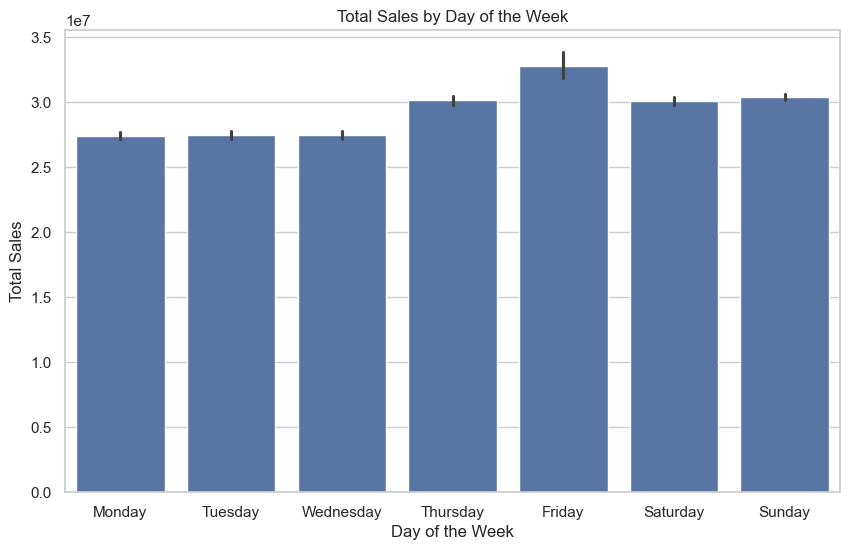

In [62]:
# Adding a day of the week column
training_data['day_of_week'] = training_data['date_id'].dt.day_name()

# Sales by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='net_sales', data=training_data, estimator=sum)
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14208\1676209329.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='item_dept', y='net_sales', data=training_data, estimator=sum, ci=None)


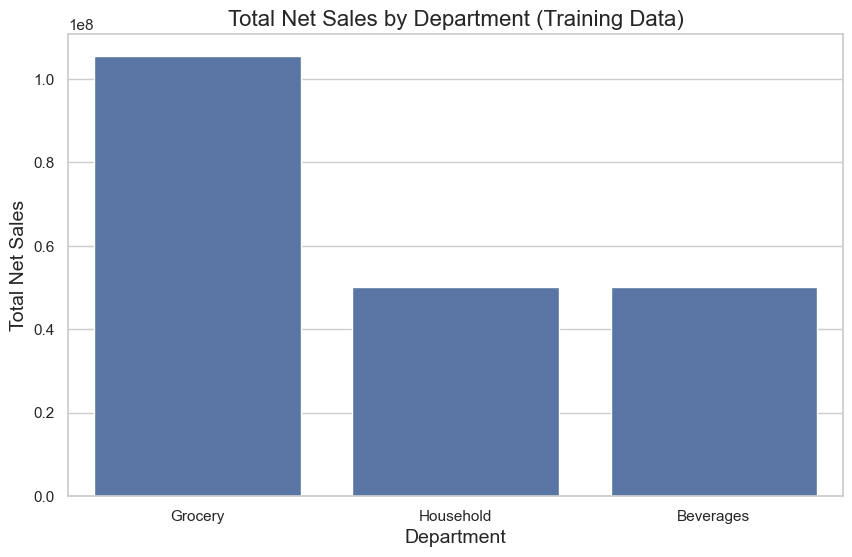

In [63]:
# Total net sales by department
plt.figure(figsize=(10, 6))
sns.barplot(x='item_dept', y='net_sales', data=training_data, estimator=sum, ci=None)
plt.title('Total Net Sales by Department (Training Data)', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Total Net Sales', fontsize=14)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14208\3688030022.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='store', y='net_sales', data=training_data, estimator=sum, ci=None, palette="husl")
C:\Users\HP\AppData\Local\Temp\ipykernel_14208\3688030022.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='store', y='net_sales', data=training_data, estimator=sum, ci=None, palette="husl")


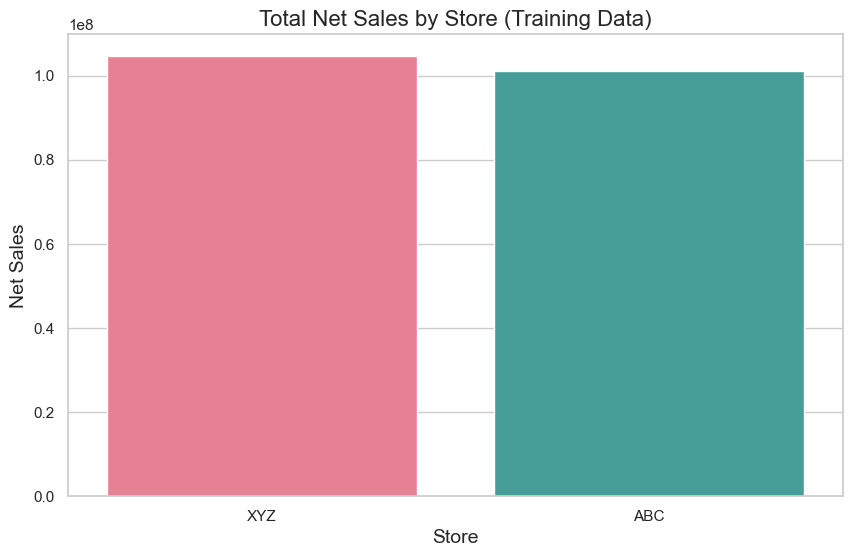

In [65]:
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Total net sales by store with a colorful palette
plt.figure(figsize=(10, 6))
sns.barplot(x='store', y='net_sales', data=training_data, estimator=sum, ci=None, palette="husl")
plt.title('Total Net Sales by Store (Training Data)', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Net Sales', fontsize=14)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14208\2360851299.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='item_dept', y='net_sales', hue='store', data=training_data, estimator=sum, ci=None, palette='Paired')


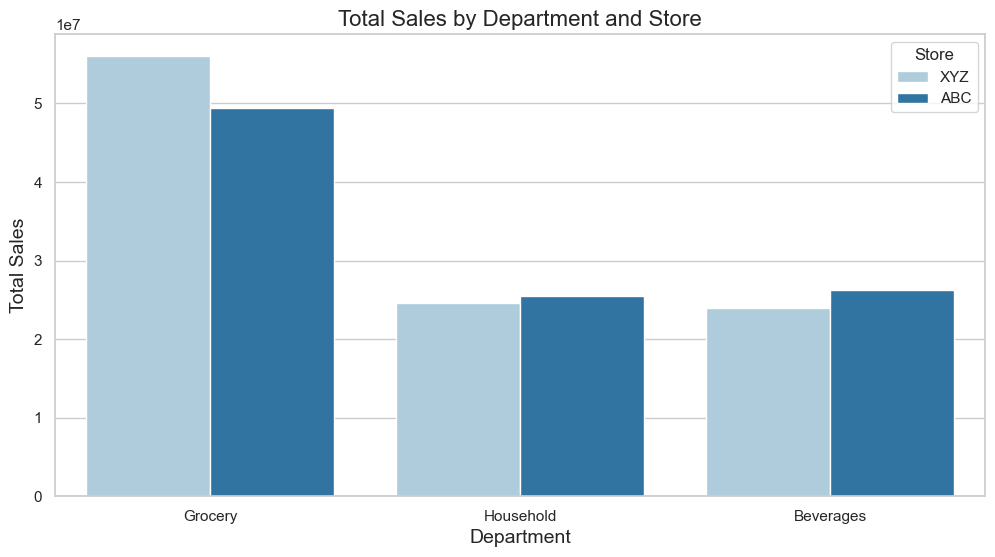

In [67]:
# Sales by Department and Store
plt.figure(figsize=(12, 6))
sns.barplot(x='item_dept', y='net_sales', hue='store', data=training_data, estimator=sum, ci=None, palette='Paired')
plt.title('Total Sales by Department and Store', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='Store')
plt.show()


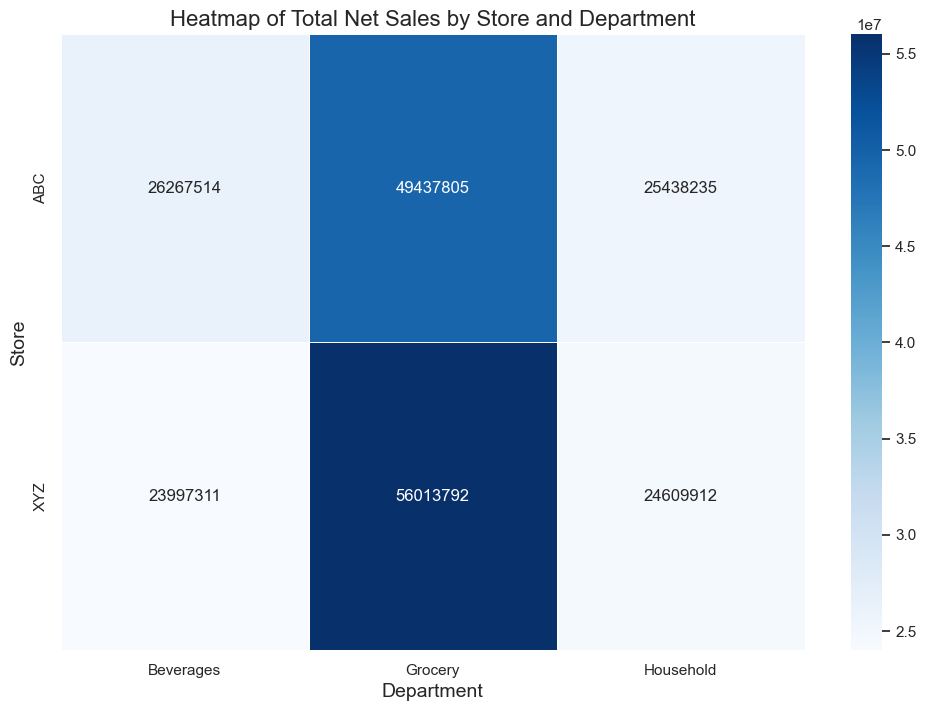

In [68]:
# Pivot the data to create a matrix for the heatmap
sales_pivot = training_data.pivot_table(values='net_sales', index='store', columns='item_dept', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sales_pivot, annot=True, fmt=".0f", cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Total Net Sales by Store and Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Store', fontsize=14)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14208\1391698753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='item_dept', y='net_sales', data=training_data, palette='Set3')


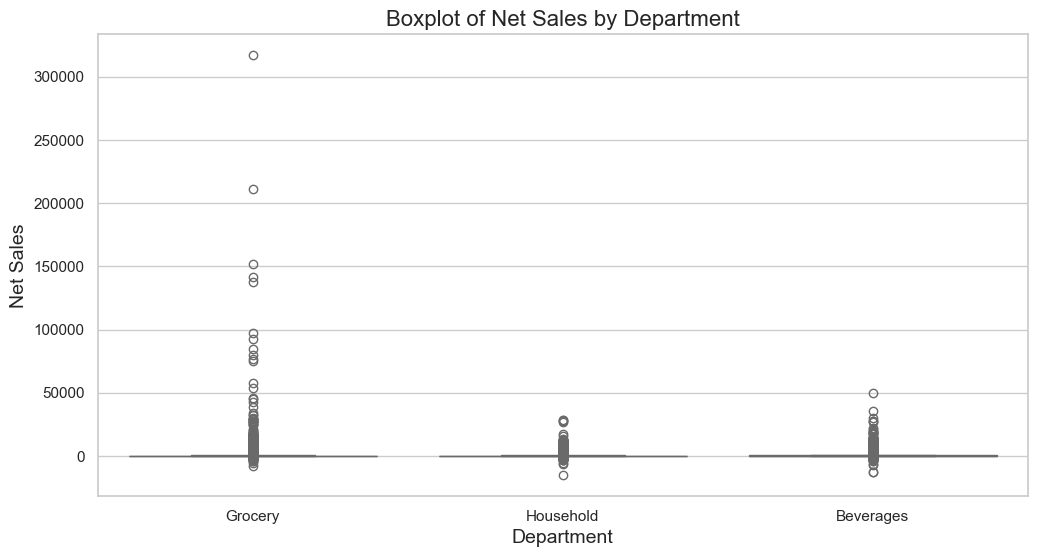

In [69]:
# Boxplot of Net Sales by Department
plt.figure(figsize=(12, 6))
sns.boxplot(x='item_dept', y='net_sales', data=training_data, palette='Set3')
plt.title('Boxplot of Net Sales by Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Net Sales', fontsize=14)
plt.show()